In [39]:
import pandas as pd
from tsl.datasets import AirQuality, MetrLA, PemsBay
from sklearn.model_selection import train_test_split
from Metrics import evaluate_datasets

Generated_path = '/Users/paulmagos/Documents/TSGen/Datasets/GeneratedDatasets/PemsBay/'
TeachForcing_path = '/Users/paulmagos/Documents/TSGen/Datasets/TeachForcingDatasets/'

In [40]:
df_PemsBay = PemsBay()
df_PemsBay = df_PemsBay.dataframe()[-5000:].reset_index(drop=True)
df_PemsBay['gen'] = 1
df_PemsBay.columns = df_PemsBay.columns.droplevel('channels')

In [41]:
syn_PemsBay_dopple = pd.read_csv(f'{Generated_path}synteticPemsBayDoppleGANger.csv')
syn_PemsBay_GTM = pd.read_csv(f'{Generated_path}synteticPemsBayGTM.csv')
syn_PemsBay_GTLSTM = pd.read_csv(f'{Generated_path}synteticPemsBayGTLSTM.csv')
syn_PemsBay_GRGN = pd.read_csv(f'{Generated_path}synteticPemsBayGRGN16.csv')
syn_PemsBay_PAR = pd.read_csv(f'{Generated_path}synteticPemsBayPAR.csv')

syn_PemsBay_dopple.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_PemsBay_dopple.columns]

syn_PemsBay_dopple['gen'] = 0
syn_PemsBay_GTM['gen'] = 0
syn_PemsBay_GTLSTM['gen'] = 0
syn_PemsBay_GRGN['gen'] = 0
syn_PemsBay_PAR['gen'] = 0

In [42]:
results_df = pd.DataFrame(columns=['dataset', 'model', 'mean_difference',
 'variance_difference',
 'skewness_difference',
 'kurtosis_difference',
 'ks_test',
 'ks_test_p_value',
 'wasserstein_distance',
 'js_divergence',
 'correlation_difference',
 'mmd_linear',
 'mmd_rbf',
 'model_accuracy',
 'model_accuracy_on_Gen',
 'model_accuracy_train_on_both',
 'model_accuracy_train_on_both_Gen'])

In [43]:
df_PemsBay.columns = [str(col) for col in df_PemsBay.columns]
syn_PemsBay_GTM.columns = [str(col) for col in syn_PemsBay_GTM.columns]
syn_PemsBay_dopple.columns = [str(col) for col in syn_PemsBay_dopple.columns]
syn_PemsBay_GTLSTM.columns = [str(col) for col in syn_PemsBay_GTLSTM.columns]
syn_PemsBay_GRGN.columns =  [str(col) for col in syn_PemsBay_GRGN.columns]
syn_PemsBay_PAR.columns =  [str(col) for col in syn_PemsBay_PAR.columns]

In [44]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_dopple, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "DoppleGANger"
res = pd.DataFrame(out, ["PemsBay DoppleGANger"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [45]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_PAR, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "PAR"
res = pd.DataFrame(out, ["PemsBay PAR"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [46]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_GTM, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "GTM"
res = pd.DataFrame(out, ["PemsBay GTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [47]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_GTLSTM, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "GTLSTM"
res = pd.DataFrame(out, ["PemsBay GTLSTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [48]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_GRGN, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "GRGN"
res = pd.DataFrame(out, ["PemsBay GRGN"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [49]:
results_df['tmp'] = (results_df['inception_score_mean'] - results_df['inception_score_std']).abs()


In [50]:
results_df_pemsBay = results_df[results_df['dataset'] == 'PemsBay'].sort_values(by=['tmp'], ascending=False).reset_index(drop=True)
results_df_pemsBay

,dataset,model,mean_difference,variance_difference,skewness_difference,kurtosis_difference,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,...,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,correlation_gen,correlation_original,inception_score_mean,inception_score_std,t_stat,t_stat_p_value,tmp
0,PemsBay,GRGN,2.350524,891.578088,3.008247,21.690986,0.395787,2.839941e-21,16.803601,0.685468,...,0.0,1.0,1.000000,0.002982,0.361645,1.557830,0.030339,3.772083,0.098961,1.527491
1,PemsBay,GTLSTM,3.676294,94.094557,23.538312,686.686246,0.749330,8.564114e-193,7.173150,0.770596,...,0.0,1.0,0.996004,0.001759,0.361645,0.629553,0.771166,4.483765,0.028567,0.141613
2,PemsBay,DoppleGANger,3.609766,60.725382,1.282612,26.428114,0.524140,1.731601e-17,6.052624,0.753856,...,0.0,1.0,0.970000,0.951573,0.361645,0.000000,0.000000,13.737356,0.040984,0.000000
3,PemsBay,PAR,1.306477,69.354226,3.009816,19.517554,0.496751,5.813445e-43,4.524578,0.718101,...,0.0,1.0,1.000000,0.003060,0.361645,0.000000,0.000000,2.878105,0.155284,0.000000
4,PemsBay,GTM,6.141761,123.188559,2.957421,21.557192,0.384825,1.098391e-10,9.190362,0.685382,...,0.0,1.0,0.996004,0.021303,0.361645,0.000000,0.000000,11.039449,0.054065,0.000000


In [51]:
results_df = results_df.sort_values(by=['correlation_gen'], ascending=True).reset_index(drop=True)
results_df

,dataset,model,mean_difference,variance_difference,skewness_difference,kurtosis_difference,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,...,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,correlation_gen,correlation_original,inception_score_mean,inception_score_std,t_stat,t_stat_p_value,tmp
0,PemsBay,GTLSTM,3.676294,94.094557,23.538312,686.686246,0.749330,8.564114e-193,7.173150,0.770596,...,0.0,1.0,0.996004,0.001759,0.361645,0.629553,0.771166,4.483765,0.028567,0.141613
1,PemsBay,GRGN,2.350524,891.578088,3.008247,21.690986,0.395787,2.839941e-21,16.803601,0.685468,...,0.0,1.0,1.000000,0.002982,0.361645,1.557830,0.030339,3.772083,0.098961,1.527491
2,PemsBay,PAR,1.306477,69.354226,3.009816,19.517554,0.496751,5.813445e-43,4.524578,0.718101,...,0.0,1.0,1.000000,0.003060,0.361645,0.000000,0.000000,2.878105,0.155284,0.000000
3,PemsBay,GTM,6.141761,123.188559,2.957421,21.557192,0.384825,1.098391e-10,9.190362,0.685382,...,0.0,1.0,0.996004,0.021303,0.361645,0.000000,0.000000,11.039449,0.054065,0.000000
4,PemsBay,DoppleGANger,3.609766,60.725382,1.282612,26.428114,0.524140,1.731601e-17,6.052624,0.753856,...,0.0,1.0,0.970000,0.951573,0.361645,0.000000,0.000000,13.737356,0.040984,0.000000


In [52]:
df = results_df

# Filter for models that contain "GRGN" in the dataset
# grgn_models = df[df['dataset'].str.contains("GRGN")]
grgn_models = results_df
# Metrics to focus on
metrics_to_compare = ['mean_difference', 'variance_difference', 'ks_test', 'wasserstein_distance', 
                      'js_divergence', 'correlation_difference', 'model_accuracy', 'inception_score_mean']

# Find the minimum for distance-based metrics and the maximum for accuracy/inception-based metrics
best_grgn_models = grgn_models.loc[:, ['dataset', 'model'] + metrics_to_compare].copy()

# For distance-based metrics, lower is better, so we will look for the minimum values.
# For accuracy-based and inception score-based metrics, higher is better.

# Normalize each metric: for distance-based (lower is better), for accuracy-based (higher is better)
for col in ['mean_difference', 'variance_difference', 'ks_test', 'wasserstein_distance', 
            'js_divergence', 'correlation_difference']:
    best_grgn_models[col + '_rank'] = best_grgn_models[col].rank(ascending=True)

# For accuracy and inception score, higher is better
for col in ['model_accuracy', 'inception_score_mean']:
    best_grgn_models[col + '_rank'] = best_grgn_models[col].rank(ascending=False)

# Calculate total rank
best_grgn_models['total_rank'] = best_grgn_models[[col + '_rank' for col in metrics_to_compare]].sum(axis=1)

# Sort by total rank to find the best overall GRGN model
best_grgn_models = best_grgn_models.sort_values('total_rank').reset_index(drop=True)

# Display the best GRGN model
best_grgn_models


,dataset,model,mean_difference,variance_difference,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy,inception_score_mean,mean_difference_rank,variance_difference_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_rank,inception_score_mean_rank,total_rank
0,PemsBay,PAR,1.306477,69.354226,0.496751,4.524578,0.718101,0.374787,0.0,0.000000,1.0,2.0,3.0,1.0,3.0,3.0,3.0,4.0,20.0
1,PemsBay,GRGN,2.350524,891.578088,0.395787,16.803601,0.685468,0.374735,0.0,1.557830,2.0,5.0,2.0,5.0,2.0,2.0,3.0,1.0,22.0
2,PemsBay,GTM,6.141761,123.188559,0.384825,9.190362,0.685382,0.354971,0.0,0.000000,5.0,4.0,1.0,4.0,1.0,1.0,3.0,4.0,23.0
3,PemsBay,DoppleGANger,3.609766,60.725382,0.524140,6.052624,0.753856,0.590104,0.0,0.000000,3.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,25.0
4,PemsBay,GTLSTM,3.676294,94.094557,0.749330,7.173150,0.770596,0.762478,0.0,0.629553,4.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,30.0


In [53]:
best_grgn_models[best_grgn_models['dataset']=='PemsBay']

,dataset,model,mean_difference,variance_difference,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy,inception_score_mean,mean_difference_rank,variance_difference_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_rank,inception_score_mean_rank,total_rank
0,PemsBay,PAR,1.306477,69.354226,0.496751,4.524578,0.718101,0.374787,0.0,0.000000,1.0,2.0,3.0,1.0,3.0,3.0,3.0,4.0,20.0
1,PemsBay,GRGN,2.350524,891.578088,0.395787,16.803601,0.685468,0.374735,0.0,1.557830,2.0,5.0,2.0,5.0,2.0,2.0,3.0,1.0,22.0
2,PemsBay,GTM,6.141761,123.188559,0.384825,9.190362,0.685382,0.354971,0.0,0.000000,5.0,4.0,1.0,4.0,1.0,1.0,3.0,4.0,23.0
3,PemsBay,DoppleGANger,3.609766,60.725382,0.524140,6.052624,0.753856,0.590104,0.0,0.000000,3.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,25.0
4,PemsBay,GTLSTM,3.676294,94.094557,0.749330,7.173150,0.770596,0.762478,0.0,0.629553,4.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,30.0


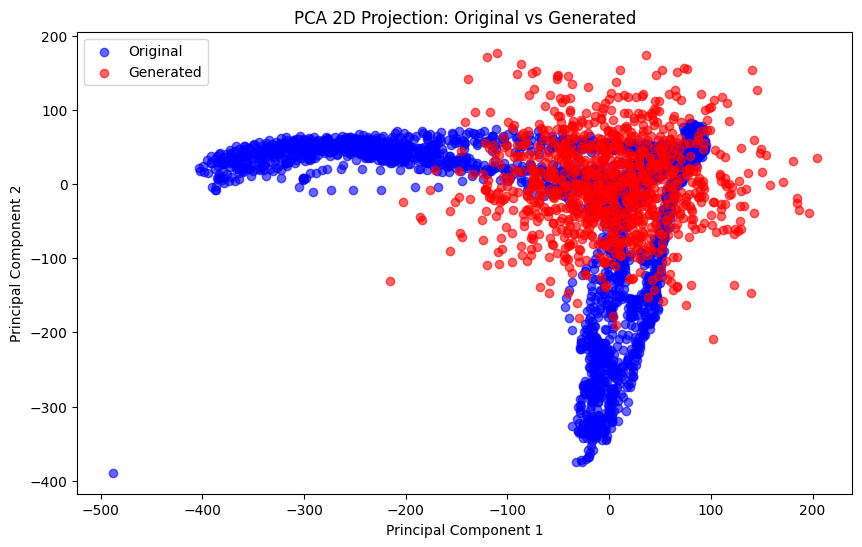

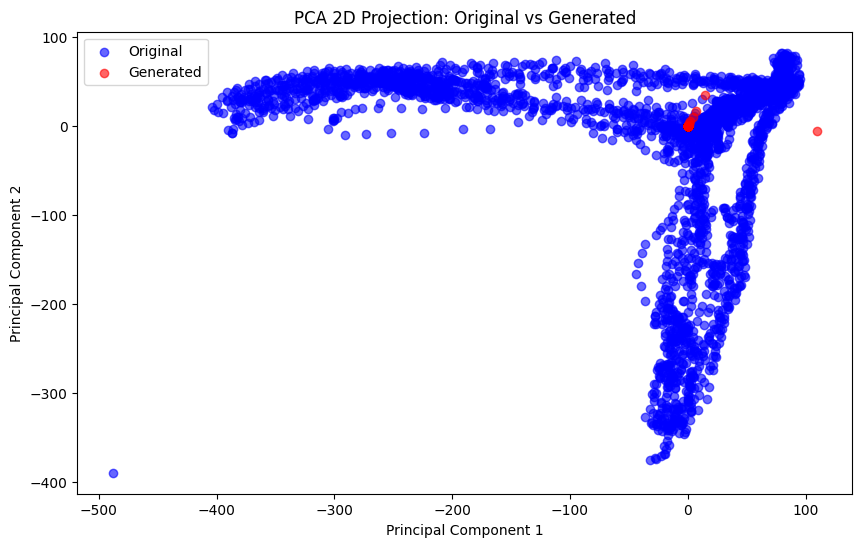

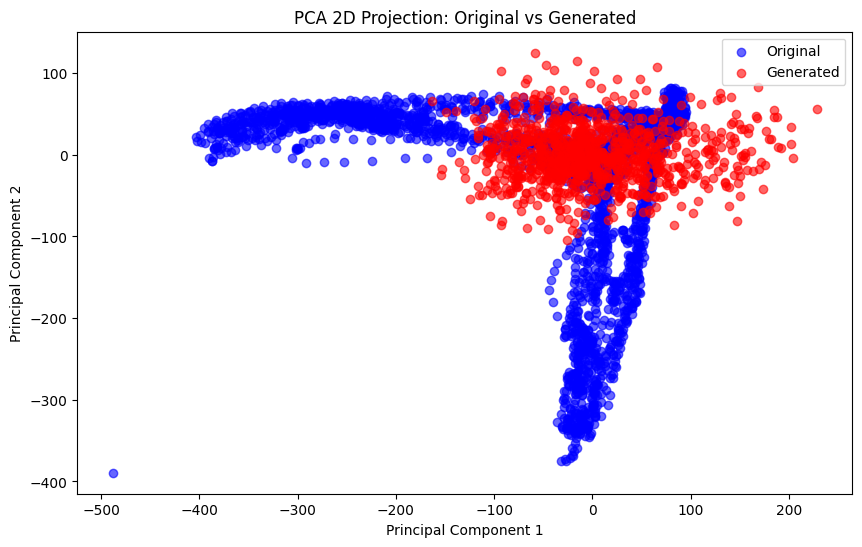

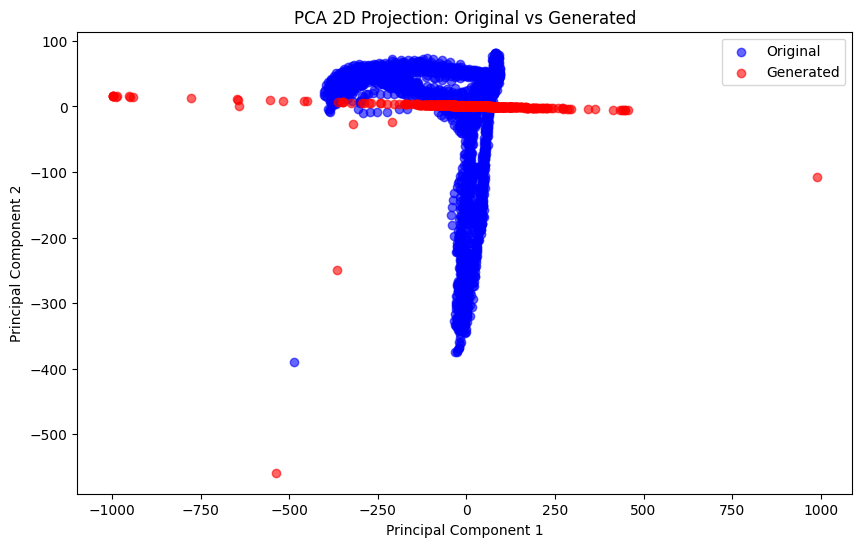

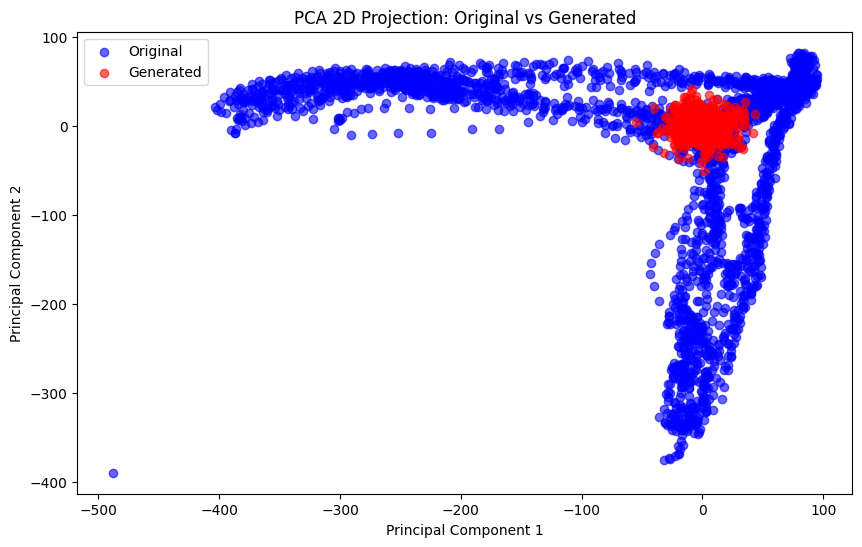

In [54]:
from VisualEval import plot_pca

plot_pca(df_PemsBay, syn_PemsBay_GRGN)
plot_pca(df_PemsBay, syn_PemsBay_GTLSTM)
plot_pca(df_PemsBay, syn_PemsBay_GTM)
plot_pca(df_PemsBay, syn_PemsBay_dopple)
plot_pca(df_PemsBay, syn_PemsBay_PAR)

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


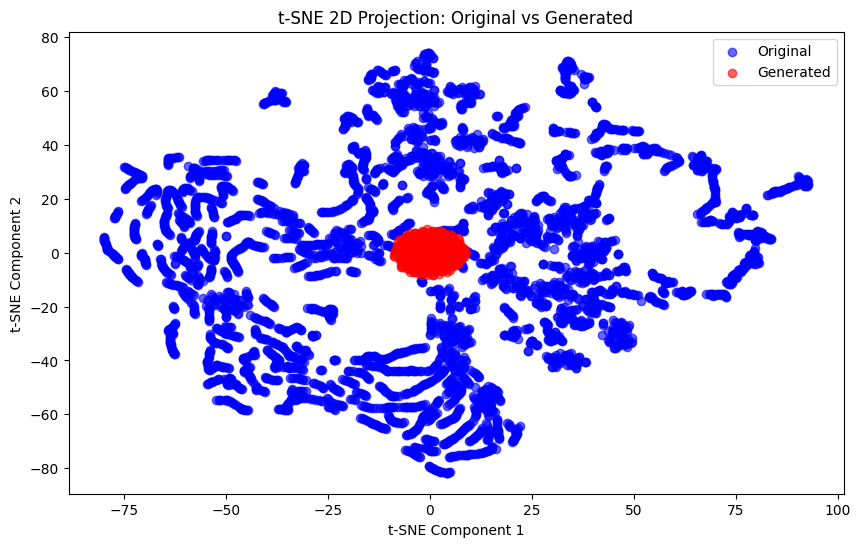

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


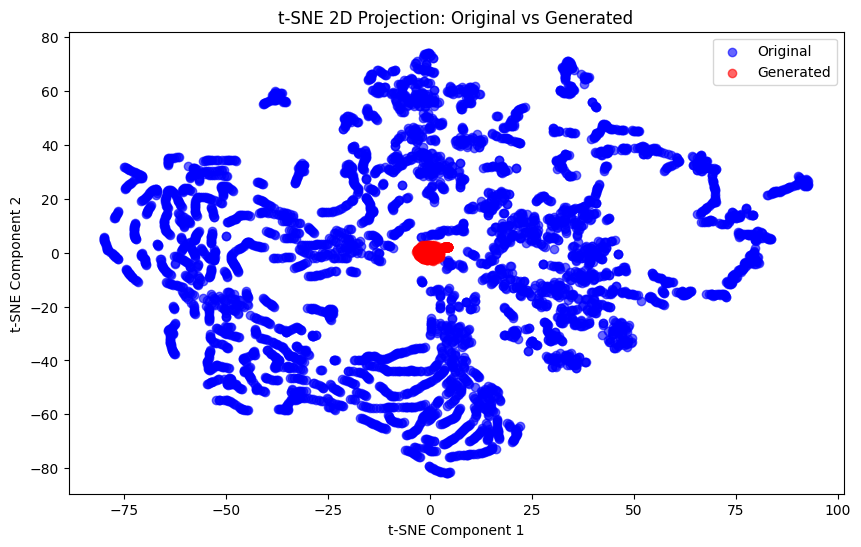

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


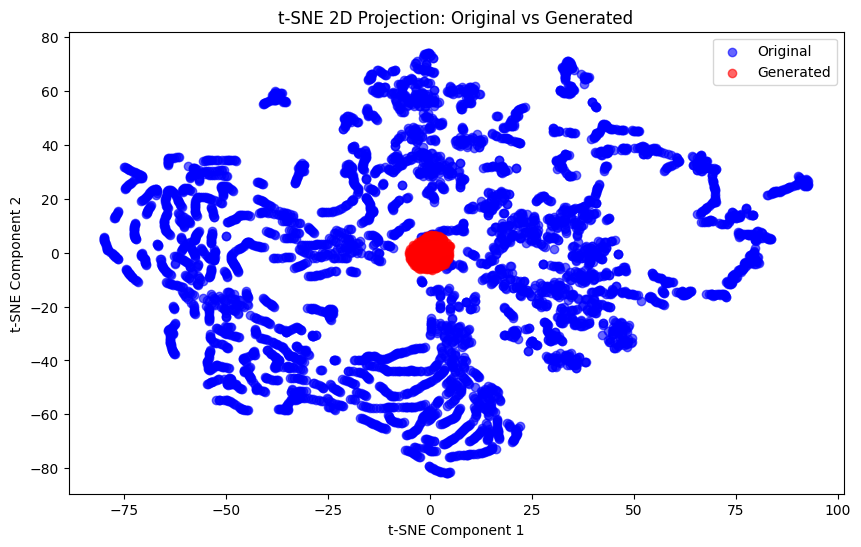

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


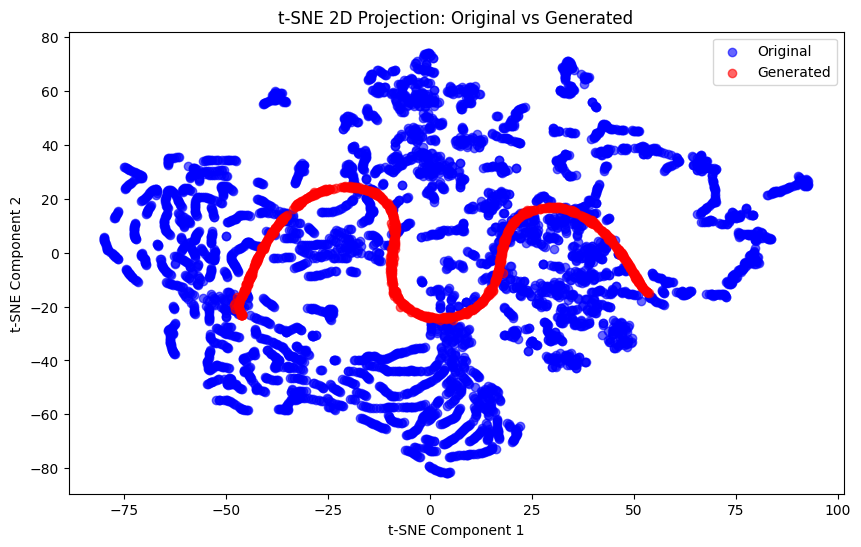

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


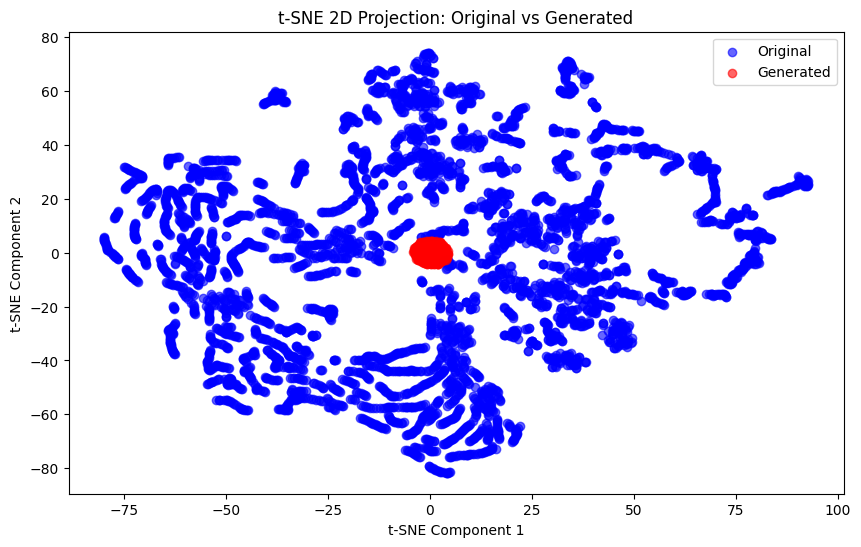

In [55]:
from VisualEval import plot_tsne

plot_tsne(df_PemsBay, syn_PemsBay_GRGN)
plot_tsne(df_PemsBay, syn_PemsBay_GTLSTM)
plot_tsne(df_PemsBay, syn_PemsBay_GTM)
plot_tsne(df_PemsBay, syn_PemsBay_dopple)
plot_tsne(df_PemsBay, syn_PemsBay_PAR)

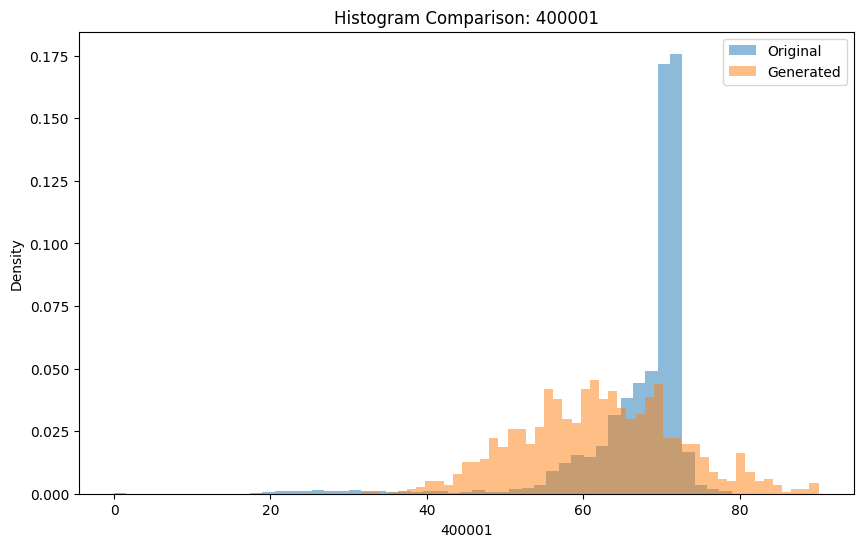

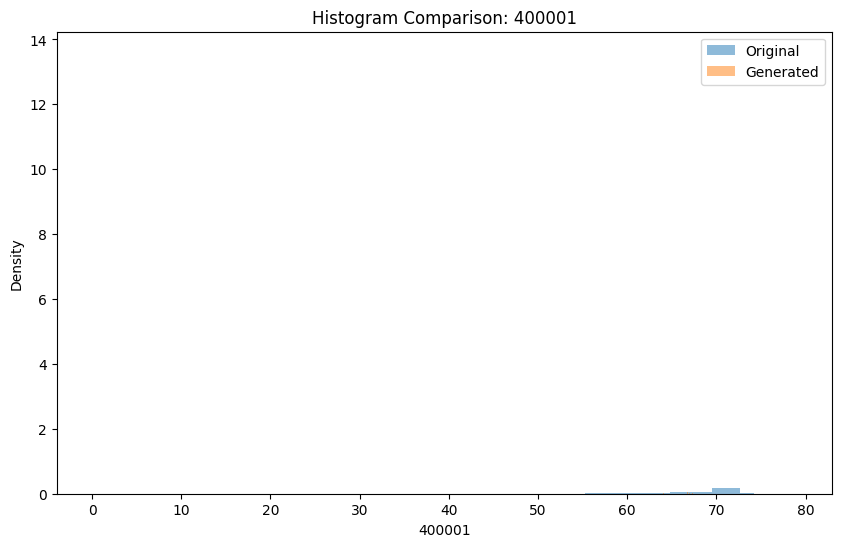

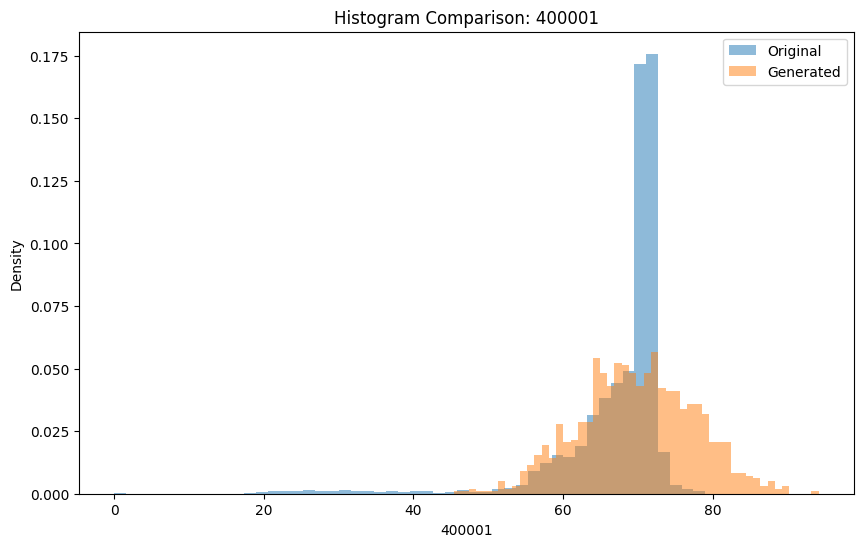

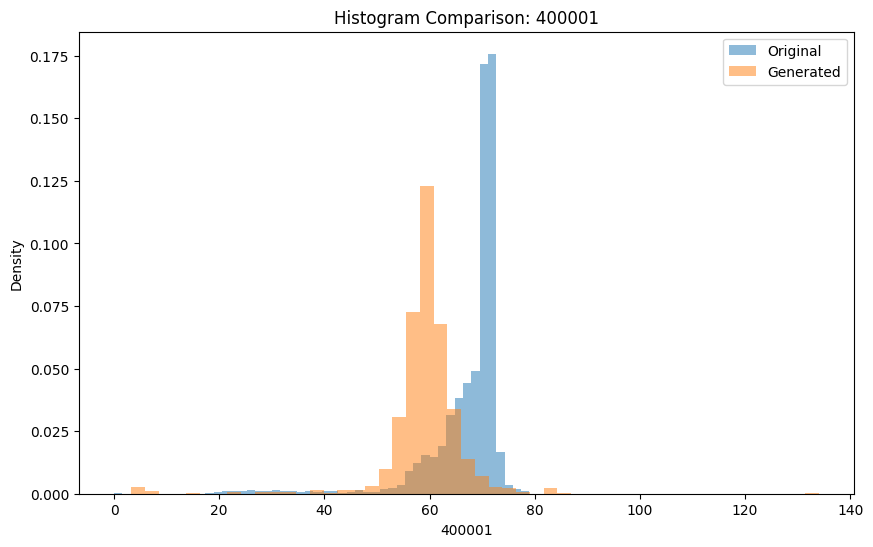

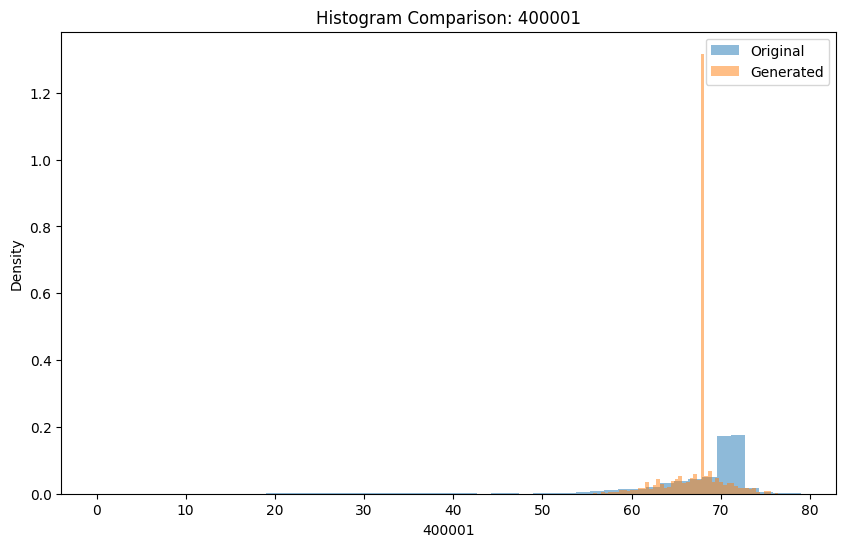

In [56]:
from VisualEval import plot_histograms

plot_histograms(df_PemsBay, syn_PemsBay_GRGN, '400001')
plot_histograms(df_PemsBay, syn_PemsBay_GTLSTM, '400001')
plot_histograms(df_PemsBay, syn_PemsBay_GTM, '400001')
plot_histograms(df_PemsBay, syn_PemsBay_dopple, '400001')
plot_histograms(df_PemsBay, syn_PemsBay_PAR, '400001')

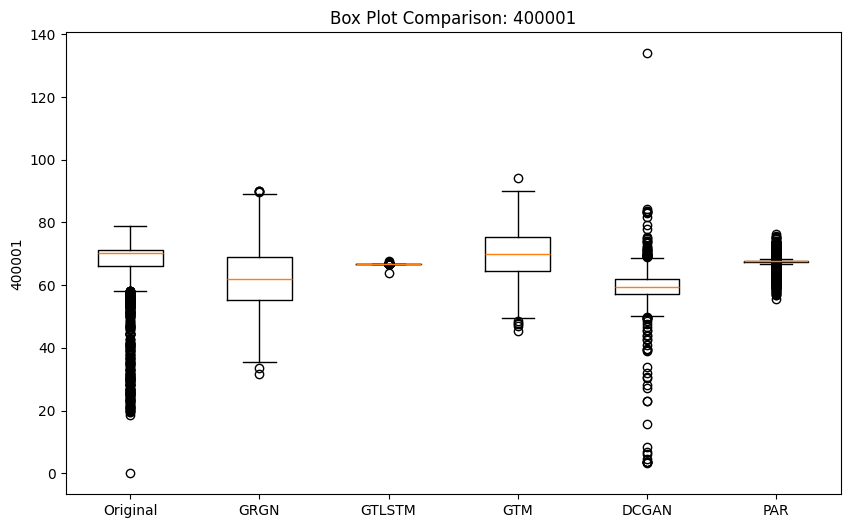

In [57]:
from VisualEval import plot_boxplots_many, plot_boxplots_means, plot_histograms_means

plot_boxplots_many('400001', ('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                   ('GTLSTM', syn_PemsBay_GTLSTM), 
                   ('GTM', syn_PemsBay_GTM), 
                   ('DCGAN', syn_PemsBay_dopple), 
                   ('PAR', syn_PemsBay_PAR))

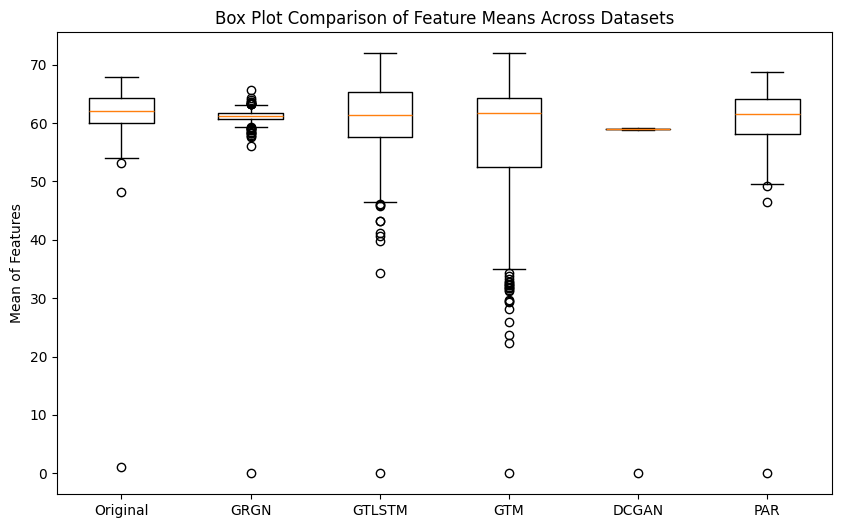

In [58]:
plot_boxplots_means(('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                   ('GTLSTM', syn_PemsBay_GTLSTM), 
                   ('GTM', syn_PemsBay_GTM), 
                   ('DCGAN', syn_PemsBay_dopple), 
                   ('PAR', syn_PemsBay_PAR))

In [59]:
df_PemsBay

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409526,409528,409529,413026,413845,413877,413878,414284,414694,gen
0,71.199997,24.299999,52.500000,58.900002,56.700001,68.199997,58.200001,55.000000,54.200001,13.900000,...,65.199997,64.099998,61.400002,58.400002,59.099998,70.900002,64.099998,67.199997,65.199997,1
1,70.699997,26.700001,50.700001,59.599998,58.599998,68.199997,55.299999,53.900002,50.700001,14.400000,...,64.000000,64.199997,61.000000,57.799999,58.900002,71.099998,64.099998,67.300003,65.900002,1
2,70.900002,27.000000,51.599998,59.200001,59.299999,68.300003,57.599998,54.000000,52.099998,14.400000,...,65.099998,64.400002,60.700001,61.000000,59.200001,71.000000,63.799999,67.500000,65.800003,1
3,72.300003,29.299999,51.900002,57.799999,60.299999,67.300003,57.799999,54.200001,50.299999,13.800000,...,64.599998,63.900002,60.400002,60.299999,58.000000,71.000000,63.900002,66.500000,65.199997,1
4,72.599998,30.000000,52.799999,57.799999,58.400002,66.900002,57.099998,53.799999,50.099998,12.900000,...,64.400002,64.300003,61.700001,61.099998,56.599998,70.500000,62.799999,66.000000,63.599998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,70.900002,66.300003,68.400002,61.000000,61.799999,66.900002,66.000000,67.400002,65.400002,69.300003,...,66.800003,64.699997,61.099998,68.400002,61.400002,70.500000,68.199997,71.599998,66.199997,1
4996,71.300003,66.599998,68.699997,60.900002,62.000000,66.199997,66.500000,68.199997,64.900002,69.099998,...,67.300003,64.800003,60.799999,69.800003,62.200001,69.400002,68.599998,71.599998,68.400002,1
4997,71.400002,66.900002,68.099998,61.099998,62.000000,66.699997,65.800003,68.199997,64.199997,69.099998,...,66.500000,64.599998,61.299999,69.500000,63.799999,70.599998,68.400002,71.599998,66.599998,1
4998,72.199997,66.500000,68.000000,61.099998,62.500000,65.800003,67.099998,68.300003,64.000000,67.300003,...,65.900002,64.800003,61.299999,69.599998,64.199997,70.199997,68.699997,71.599998,68.400002,1


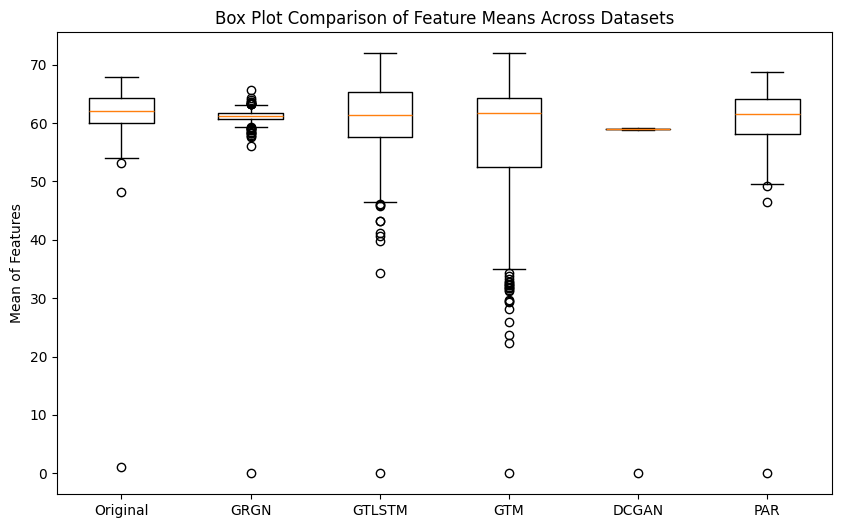

In [60]:
plot_boxplots_means(('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                   ('GTLSTM', syn_PemsBay_GTLSTM), 
                   ('GTM', syn_PemsBay_GTM), 
                   ('DCGAN', syn_PemsBay_dopple), 
                   ('PAR', syn_PemsBay_PAR))

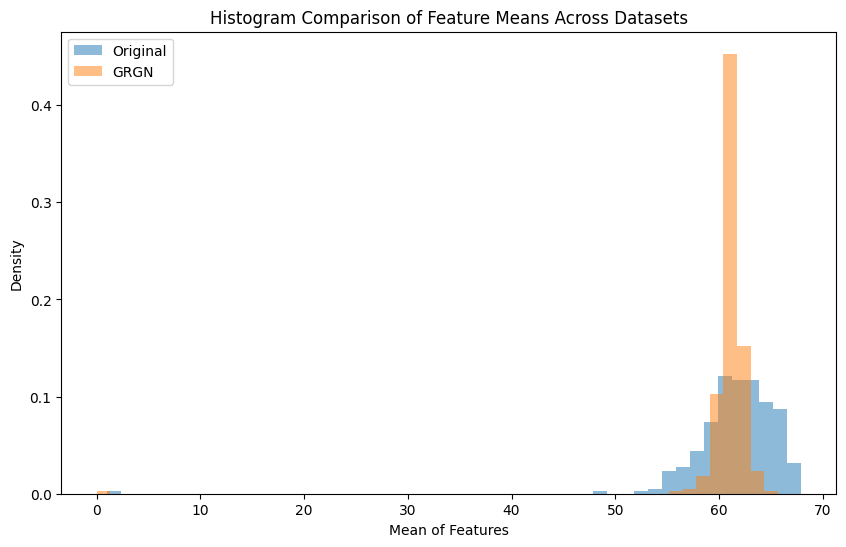

In [61]:
plot_histograms_means(('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                #    ('PAR', syn_PemsBay_PAR)
                   )